# Introduction to DICOM & Voxels
![image.png](https://www.andersondiagnostics.com/wp-content/uploads/2017/09/CT-Scanner.jpg)

### What is a DICOM?
**D**igital **I**maging and **Co**mmunications in **M**edicine (DICOM) - an international standard related to the exchange, storage and communication of digital medical images. Prior to this format, there was no standardized way to transfer medical scans. So loading up a single patient's study outside the hospital, in older formats took about 10-30 minutes for a single scan! 

While DICOM 16-bit images (with values ranging from -32768..32767), other 8-bit greyscale images store values 0 - 255. These value ranges in DICOM are useful, as they correlate with the [Hounsfield Scale](https://en.wikipedia.org/wiki/Hounsfield_scale). Each voxel can store a large amount of information.

NB: If you want to get right to the code & image example, click [here](#example)

### Physics of CT Scans
**CT (computed tomography)** uses X-rays to obtain images. A heated cathode releases high-energy electrons, which in turn release their energy as X-ray radiation. X-rays pass through tissues and hit a detector on the other side.**The more dense a tissue, the more X-rays it absorbs.**

* Bone: X-rays absorbed = few X-rays reaching detector: White
* Air: X-rays not absorbed = lots of X-rays reaching detector: Black
Compared to plain film, **CT is able to distinguish more subtle density differences and there is no overlap of structures.

Current CT machines use ‘Spiral CT’. This consists of a single radiation source with multiple detectors which rotates around the patient, obtaining a block of data as the patient is moved through.

"<table><tr><td><img src='https://www.radiologycafe.com/images/basics/ct-machine.png'></td><td><img src='https://www.radiologycafe.com/images/basics/ct-planes.png'></td></tr></table>"

The information obtained can be reconstructed by a computer to form a 3D “volume”, which can then be “re-sliced” digitally to obtain thinner slices as well as slices in different planes.

### Phases of CT Scan:
Phases of a scan refer to when the images are taken, relative to time of contrast administration.
**Contrast Administration:** Intravenous contrast is used in CT to help highlight blood vessels and to enhance the tissue structure of various organs such as the brain, spine, liver and kidneys. "Intravenous" means that the contrast is injected into a vein using a small needle. Some imaging exams of the abdomen and gastrointestinal system use both the intravenous iodine and orally administered barium contrast for maximum sensitivity.

$$(non or pre contrast) > (arterial) > (venous) > (delayed)$$

The arterial phase comes before the venous phase, because even though contrast is given into a vein, within approximately 30 seconds, the contrast has passed through the heart and into the arterial system.

* The chest is usually imaged in the arterial phase.
* The abdomen is usually imaged in the (portal) venous phase.
* Liver lesions are usually imaged with a multiple phase scan.

In a CT chest/abdo/pelvis, the lung bases/liver may be imaged twice (overlap between chest - arterial phase, and abdomen - venous phase)

### Windowing: 
Windowing, also known as **grey-level mapping**, **contrast stretching**, **histogram modification** or **contrast enhancement** is the process in which the CT image greyscale component of an image is manipulated via the CT numbers; doing this will change the appearance of the picture to highlight particular structures. The brightness of the image is adjusted via the window level. The contrast is adjusted via the window width.

Tissue density is measured in [Hounsfield units (HU)](https://en.wikipedia.org/wiki/Hounsfield_scale)

* This is defined as **Air = −1000 HU**; **Water = 0 HU.**

Density of tissues in CT-Scans: $$Air < Fat < Fluid < Soft tissue < Bone < Metal$$
The easier way to remember this is (Fat floats on water, so is less dense than fluid; Soft tissue is mostly intracellular fluid with some connective tissue)

* Air = −1000 HU
* Lung ≈ −500 HU (partially air, partially soft tissue)
* Fat ≈ −50 HU (slightly less dense than simple fluid)
* Water = 0 HU
* Soft tissue (& blood) ≈ +50 HU (slightly more dense than simple fluid)
* Bone ≈ +1000 HU (much more dense)

![](https://www.radiologycafe.com/images/basics/window-basic.png)
To ascertain a window, a ‘level’ and a ‘width’ is defined. For example, a window with a level of 0 HU and a width of 400 HU will have a range of −200 HU to +200 HU. Any tissue with a density of −200 HU or less will be black, and any tissue with a density of +200 HU or more will be white. And values between -200 HU to +200 HU will be spread between the whole grayscale range. A **window** can be set to look at certain tissues of interest. **A small range of tissue density is represented by a full greyscale spectrum from black to white, thus making subtle density differences within the specified range easier to see.**






### Typical window width and level values: 
Although this varies somewhat from institution to institution and vendor to vendor, window width and centers are generally fairly similar. **The values below are written as width and level (W:x L:y) in Hounsfield units (HU).**

* head and neck
* brain W:80 L:40
* subdural W:130-300 L:50-100
* stroke W:8 L:32 or W:40 L:40 3
* temporal bones W:2800 L:600
* soft tissues: W:350–400 L:20–60 4
* chest
* lungs W:1500 L:-600
* mediastinum W:350 L:50
* abdomen
* soft tissues W:400 L:50
* liver W:150 L:30
* spine
* soft tissues W:250 L:50
* bone W:1800 L:400



### Window width
The window width (WW) as the name suggests is the measure of the range of CT numbers that an image contains. A wider window width (2000 HU), therefore, will display a wider range of CT numbers. Consequently, the transition of dark to light structures will occur over a larger transition area to that of a narrow window width (<1000 HU). Accordingly, it is important to note, that a significantly wide window displaying all the CT numbers will result in different attenuations between soft tissues to become obscured.

**Wide window:** When you are looking at an area with predominantly different tissue density, a wide window is used. A good example is lungs or cortical tissue, where air and vessels will sit side by side.

**Narrow window:** When you are looking at tissues with almost similar density, you should use narrow window. As a result subtle changes in tissued density (small window) is magnified over the whole grayscale range. 

### Window level/center
The window level (WL), often also referred to as window center, is the midpoint of the range of the CT numbers displayed. **When the window level is decreased the CT image will be brighter and vice versa.** 

### Upper and lower grey level calculation 
When presented with a Window width (WW) and Widnow Level (WL) one can calculate the upper and lower grey levels i.e. values over x will be white and values below y will be black. 

* the upper grey level (x) is calculated via WL + (WW ÷ 2)
* the lower grey level (y) is calculated via WL - (WW ÷ 2)

For example, a brain is W:80 L:40.  Therefore, all values above +80 will be set to maximum grayscale level (white) and all values below 0 will be set to lowest grayscale level in the display (black). And values between +0 to +80 will be spread between the whole grayscale range.  

Examples of commonly used windows are soft tissue, lung, and bone are given below: 

### Lung tissue window
A lung window is used to view lung parenchyma. Lung parenchyma (−500 HU) would be within range, appearing grey. Air pockets (−1000 HU) around the lung, such as pneumothorax or bullae, would appear black, thus allowing clear differentiation.
<img src="https://www.radiologycafe.com/images/basics/window-lung.png" align="center"/>
<h7><center>Level: −200 HU; Width: 2000 HU (Range: −1200 to +800),</center></h7>
<img src="https://www.radiologycafe.com/images/basics/ct-window-lung.jpg" align="center"/>
<h7><center>Lung window on a chest CT</center></h7>

### Soft tissue window
A soft tissue window is used to view most organs. A soft tissue window cannot be used for lung parenchyma, as lung density (−500 HU) is outside range and will appear completely black.
<img src="https://www.radiologycafe.com/images/basics/window-soft.png" align="center"/>

<h7><center>Level: +50 HU; Width: 350 HU (Range: −125 to +225)</center></h7>
<img src="https://www.radiologycafe.com/images/basics/ct-window-soft.jpg" align = "center"/>
<h7><center>Soft tissue window on a chest CT</center></h7>

### Bone window
A bone window is used to view bone detail.
There is good differentiation within the range of high densities found in the bony cortex and medulla.
<img src="https://www.radiologycafe.com/images/basics/window-bone.png" align="center" />
<h7><center>Level: 300 HU; Width: 2000 HU (Range: −700 to +1300)</center></h7>
<img src="https://www.radiologycafe.com/images/basics/ct-window-bone.jpg" align = "center" />
<h7><center>Bone window on a chest CT</center></h7>

<a id="workflow"></a>
# Workflow of a Radiologist

This website shows a typical workflow, thought process and professional approach that a radiologists takes, when given a task to detect any abnormalities on a CT scan of the lung. [radiopedia.org](https://radiopaedia.org/articles/ct-chest-non-contrast-technique?lang=gb) There are some details that I will skip over, as they are dealing with 3D scans in real life. In our dataset, for each patient ID we have only one slice (2D) of the lung to make our diagnosis from. 

> To be as good as a radiologist, you have to start thinking like one.

The issue that I want to highlight is how important windows are in a **radiologist's workflow**. Just looking at the bare images provided in the raw CT-scans provides a good looking image for non-med people however, from a radiologist's point of view, that provides little information about what he is actually looking for. In this case the importance of windowing comes in. 


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os, glob
import pydicom as dcm
print('Loaded in libraries!')

Loaded in libraries!


In [2]:
PATH = "../input/rsna-str-pulmonary-embolism-detection/"

train_df = pd.read_csv(PATH + "train.csv")
test_df = pd.read_csv(PATH + "test.csv")

TRAIN_PATH = PATH + "train/"
TEST_PATH = PATH + "test/"
sub = pd.read_csv(PATH + "sample_submission.csv")
train_image_file_paths = glob.glob(TRAIN_PATH + '/*/*/*.dcm')
test_image_file_paths = glob.glob(TEST_PATH + '/*/*/*.dcm')

print(f'Train dataframe shape  :{train_df.shape}')
print(f'Test dataframe shape   :{test_df.shape}')

print(f'Number of train images : {len(train_image_file_paths)}')
print(f'Number of test images  : {len(test_image_file_paths)}')

Train dataframe shape  :(1790594, 17)
Test dataframe shape   :(146853, 3)
Number of train images : 1790594
Number of test images  : 146853


### Utility Functions. 

In [3]:
# Function to take care of teh translation and windowing. 
def window_image(img, window_center,window_width, intercept, slope, rescale=True):
    img = (img*slope +intercept) #for translation adjustments given in the dicom file. 
    img_min = window_center - window_width//2 #minimum HU level
    img_max = window_center + window_width//2 #maximum HU level
    img[img<img_min] = img_min #set img_min for all HU levels less than minimum HU level
    img[img>img_max] = img_max #set img_max for all HU levels higher than maximum HU level
    if rescale: 
        img = (img - img_min) / (img_max - img_min)*255.0 
    return img
    
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == dcm.multival.MultiValue: return int(x[0])
    else: return int(x)
    
def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [4]:
def view_images(files, title = '', aug = None, windowing = True):
    width = 2
    height = 2
    fig, axs = plt.subplots(height, width, figsize=(15,15))
    
    for im in range(0, height * width):
        data = dcm.dcmread(files[im])
        image = data.pixel_array
        window_center , window_width, intercept, slope = get_windowing(data)
        if windowing:
            output = window_image(image, window_center, window_width, intercept, slope, rescale = False)
        else:
            output = image
        i = im // width
        j = im % width
        axs[i,j].imshow(output, cmap=plt.cm.gray) 
        axs[i,j].axis('off')
        
    plt.suptitle(title)
    plt.show()

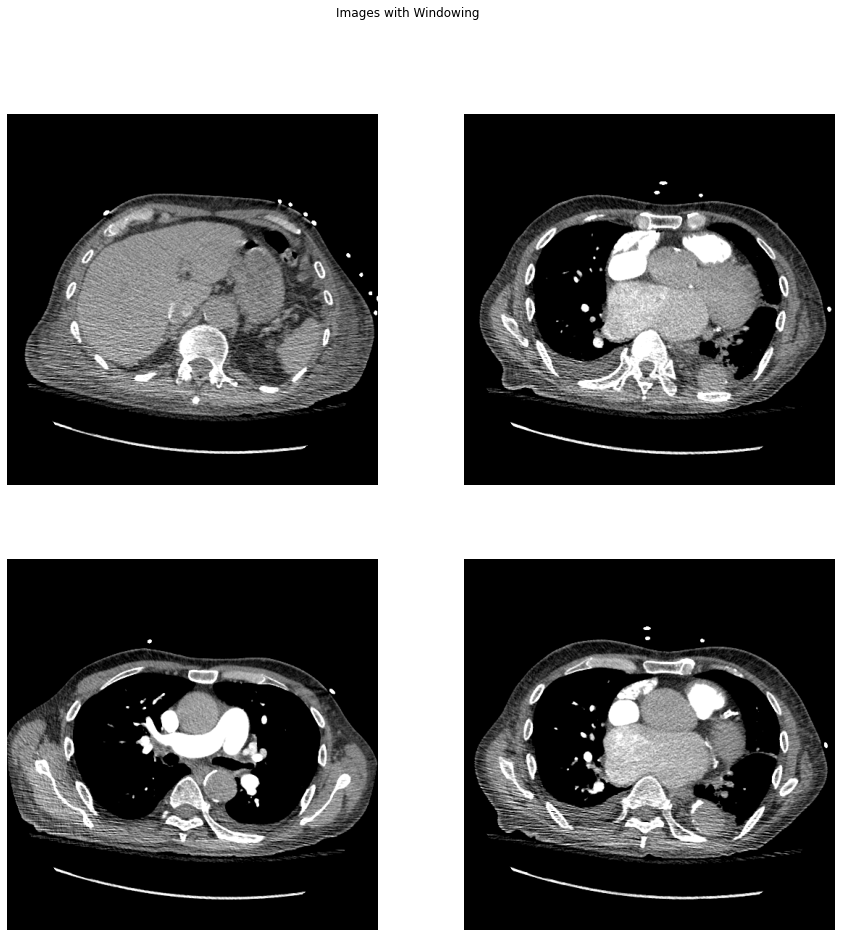

In [5]:
view_images(train_image_file_paths[3200:], 'Images with Windowing')

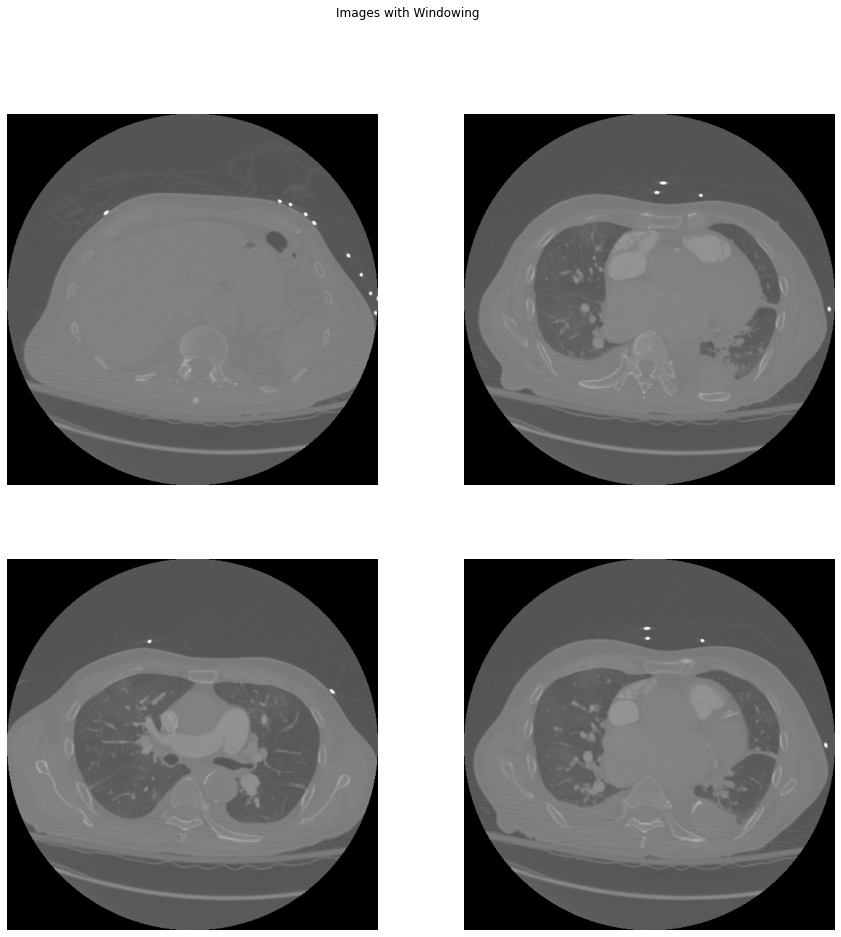

In [6]:
view_images(train_image_file_paths[3200:], title = 'Images with Windowing', windowing=False)

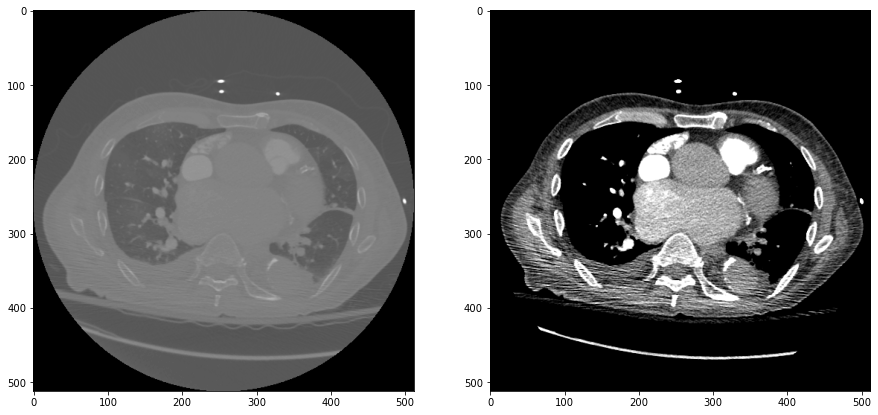

In [7]:
data = dcm.dcmread(train_image_file_paths[3203])
image = data.pixel_array
window_center , window_width, intercept, slope = get_windowing(data)
output = window_image(image, window_center, window_width, intercept, slope, rescale = False)
f, axarr = plt.subplots(1,2, figsize=(15,10))
axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(output, cmap = 'gray')

In [8]:
data = dcm.dcmread(train_image_file_paths[3203])
image = data.pixel_array
window_center , window_width, intercept, slope = get_windowing(data)

print(window_center , window_width, intercept, slope)
from ipywidgets import interact


40 350 -1024 1


In [9]:
def int_print(window_center , window_width=500, intercept=-1024, slope=1):
    output = window_image(image, window_center, window_width, intercept, slope, rescale = False)
    f, axarr = plt.subplots(1,2, figsize=(15,10))
    axarr[0].imshow(image, cmap='gray')
    axarr[1].imshow(output, cmap = 'gray')
    

### Interactively set the window parameter for the best view:
The following segment of code produces an interactive window where you are able to change the parameter of the function. 
For viewing interactive features, please fork the code and then run it separately to view the interactive features. 

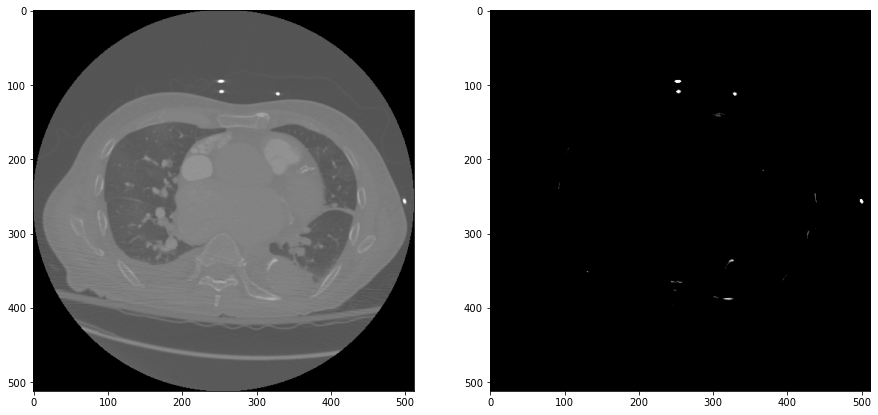

<function __main__.int_print(window_center, window_width=500, intercept=-1024, slope=1)>

In [10]:
interact(int_print, window_center= 1000)

In [11]:
import pandas as pd

PATH = "../input/rsna-str-pulmonary-embolism-detection/"
train = pd.read_csv(PATH + "train.csv")
sub = pd.read_csv(PATH + "sample_submission.csv")

feats = list(train.columns[3:5])+list(train.columns[8:12])+list(train.columns[13:17])
means = train[feats].mean().to_dict()


sub['label'] = 0.28
for feat in means.keys():
    sub.loc[sub.id.str.contains(feat, regex=False), 'label'] = means[feat]
    
sub.to_csv('submission.csv', index = False)

## References.
* [See like a Radiologist with Systematic Windowing](https://www.kaggle.com/dcstang/see-like-a-radiologist-with-systematic-windowing) by [David Tang](https://www.kaggle.com/dcstang)
* https://radiopaedia.org/articles/ct-chest-non-contrast-technique?lang=gb
* https://radiopaedia.org/articles/ct-pulmonary-angiogram-technique?lang=gb
* https://en.wikipedia.org/wiki/Hounsfield_scale
* [EDA: View dicom images with correct windowing](https://www.kaggle.com/omission/eda-view-dicom-images-with-correct-windowing) by [Richard McKinley](https://www.kaggle.com/omission)


![](https://www.clipartmax.com/png/middle/265-2655834_work-in-progress-icon.png)





### In the meantime, check out my other ongoing works in this same competition: 
💥 [RSNA-STR Pulmonary Embolism [Dummy Sub]](https://www.kaggle.com/redwankarimsony/rsna-str-pulmonary-embolism-dummy-sub)<br>
💥 [CT-Scans, DICOM files, Windowing Explained](https://www.kaggle.com/redwankarimsony/ct-scans-dicom-files-windowing-explained)<br>
💥 [RSNA-STR-PE [Gradient & Sigmoid Windowing]](https://www.kaggle.com/redwankarimsony/rsna-str-pe-gradient-sigmoid-windowing)<br>
💥 [RSNA-STR [✔️3D Stacking ✔️3D Plot ✔️Segmentation]](https://www.kaggle.com/redwankarimsony/rsna-str-3d-stacking-3d-plot-segmentation/edit/run/42517982)<br>
💥 [RSNA-STR [DICOM 👉 GIF 👉 npy]](https://www.kaggle.com/redwankarimsony/rsna-str-dicom-gif-npy)<br>
💥 [RSNA-STR Pulmonary Embolism [EDA]](https://www.kaggle.com/redwankarimsony/rsna-str-pulmonary-embolism-eda)<br>

